In [1]:
from flask import Flask, jsonify, request
from app.models.User import User 
from app.models.db import session
import io
from app.schemas.User import UserSchema
import pandas as pd
from datetime import date
from flask import Response
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import matplotlib.pyplot as plt

def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

def fig_to_response(fig):
    output = io.BytesIO()
    FigureCanvas(fig).print_png(output)
    return Response(output.getvalue(), mimetype='image/png')

In [2]:
users = session.query(User).all()
schema = UserSchema()
users = schema.dump(users, many=True)
result = pd.DataFrame(users)
result["bdate"] = pd.to_datetime(result["bdate"])
result["age"] = result["bdate"].apply(calculate_age)

/home/alena/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


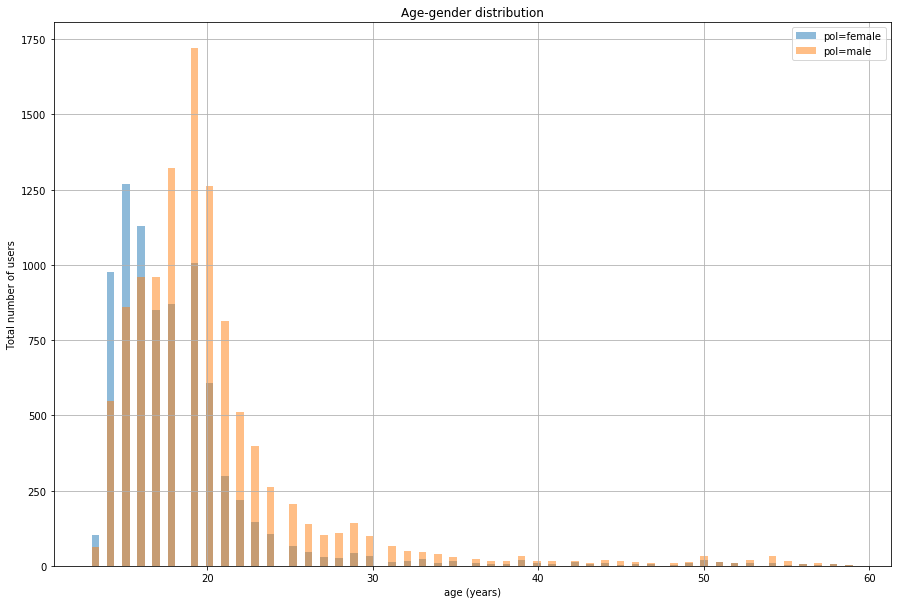

In [10]:
fig = plt.figure(figsize=(15,10))
pol = { 1: "female", 
       2: "male"}
for p in pol:
    result[result["sex"]==p][result["age"]<60]["age"].hist(bins=100, 
                                                           alpha=0.5,  
                                                           label=f"pol={pol[p]}", 
                                                           log=False) 
plt.legend()
plt.title("Age-gender distribution")
plt.xlabel("age (years)")
plt.ylabel("Total number of users")
response = fig_to_response(fig)